<a href="https://colab.research.google.com/github/njonge-nathan/IP_WEEK_7_SUPERVISED_MACHINE_LEARNING_REGRESSION_MODELS/blob/main/WEEK_7_IP_NATHAN_NJONGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with EDA - Week 7 IP

## Defining The Question

### a) Specifying the Question

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

### b) Defining the Metric for Success

### c) Understanding the Context

### d) Recording the Experimental Design

### e) Data Relevance

## 2) Reading the Data 

In [243]:
# load our libraries
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns
# summary table libraries
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# load our dataset from the url provided
url = 'http://bit.ly/IndependentProjectWeek7Dataset'
house = pd.read_csv(url)


## 3) Checking the data

In [244]:
# Dtermining the no of records
house.shape

(21613, 20)

Our dataset contains 21613 rows and 20 columns 

In [245]:
# previewing the top of our dataset
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [246]:
# previewing the bottom of our dataset
house.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [247]:
# view info of our dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [248]:
# getting the recent renovated house price description
house_most_recent = house[house['yr_renovated'] == max(house['yr_renovated'])].reset_index()
house_most_recent.head()

,index,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2295,8712100320,585000.0,5,2.75,2350,4178,1.5,0,0,3,8,1520,830,1922,2015,98112,47.6388,-122.300,1920,4178
1,3156,6821100195,830000.0,4,3.00,2020,6000,1.0,0,0,3,8,1220,800,1968,2015,98199,47.6563,-122.401,1400,6000
2,4240,6071800100,815000.0,6,3.00,2860,17853,1.0,0,0,3,8,1430,1430,1962,2015,98006,47.5460,-122.175,1920,13452
3,5683,2202500255,335000.0,3,2.00,1210,9926,1.0,0,0,4,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
4,7097,9141100005,285000.0,4,3.50,2770,10505,2.0,0,0,3,8,2770,0,1940,2015,98133,47.7412,-122.355,1760,10505


In [249]:
# view the bottom of our dataset
house_most_recent.tail()

,index,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11,14859,3585900665,805000.0,5,2.50,4600,19831,1.0,0,3,3,9,2300,2300,1956,2015,98177,47.7608,-122.378,2890,19831
12,15687,3585900190,825000.0,3,2.50,3400,38400,1.0,0,4,3,8,1870,1530,1955,2015,98177,47.7611,-122.372,3400,24338
13,16683,5113000420,420000.0,4,2.75,2400,20000,1.0,0,0,3,8,1170,1230,1961,2015,98058,47.4556,-122.087,1690,20000
14,18575,8935100100,476000.0,4,3.00,2890,6885,1.0,0,0,3,7,1590,1300,1945,2015,98115,47.6763,-122.282,2180,6885
15,19444,582000644,872500.0,4,2.00,1990,6000,1.0,0,0,3,9,1260,730,1956,2015,98199,47.6515,-122.397,1770,6000


The last renovation was done in the year 2015 and the prices of those houses are relatively high

Summary table

In [250]:
# create a summary table
house_summary = house_most_recent.groupby(['yr_renovated'])[['price','bedrooms','bathrooms','view']].sum().reset_index()

# create column headers/labels
labels = ['Last Year Renovated','Total Price of the Houses','Number of bedrooms','Number of bathrooms','Number of views']

fig = go.Figure(data=[go.Table(header = dict(values=labels),
                               cells=dict(values=house_summary.loc[0,['yr_renovated','price','bedrooms','bathrooms','view']]))
])
fig.update_layout(title='Total House Prices Based on Recent Renovation Summary: ' ,)
fig.show()

In [251]:
# house prices overtime
house_price = house.groupby(['yr_built'])[['price','bedrooms','bathrooms','view']].sum().reset_index().sort_values("yr_built", ascending=True).reset_index(drop=True)
house_price

,yr_built,price,bedrooms,bathrooms,view
0,1900,50593687.0,285,150.50,22
1,1901,16156142.0,105,45.75,2
2,1902,18176200.0,96,52.00,2
3,1903,22124077.0,141,69.25,11
4,1904,26274049.0,131,67.50,3
...,...,...,...,...,...
111,2011,70804290.0,451,343.25,14
112,2012,89664287.0,608,449.00,16
113,2013,136398516.0,773,573.00,36
114,2014,382240111.0,2082,1535.25,61


In [252]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=house_price.yr_built, y=house_price['price'],
                         mode='lines',
                         name='House Prices'))

fig.update_layout(
    title='Evolution of house prices over time',
    template='plotly_white',
    yaxis_title='Prices',
    xaxis_title='Years',
)
fig.show()

House prices evolution for for Hass Consulting Company from 1900 to 2015

The prices have been gradually increasing over time

In [253]:
pip install geopandas

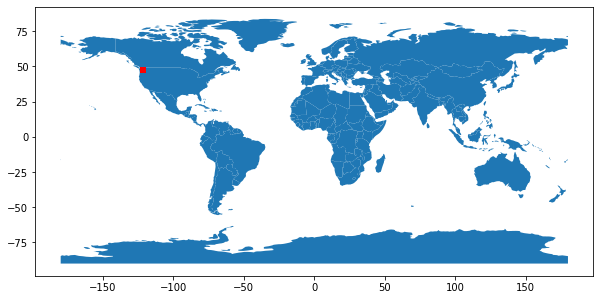

In [254]:
# world plot of house regions using geopandas 
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(house['long'],house['lat'])]
gdf = GeoDataFrame(house, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

In [255]:
# plot of the houses location on world map using plotly
fig = px.scatter_geo(house,lat='lat',lon='long', hover_name="id")
fig.update_layout(title = 'World map with Houses Location', title_x=0.5)
fig.show()

## 4) External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a)Validation

## 5) Tidying the Dataset

Text(0.5, 1.0, 'Boxplot of price')

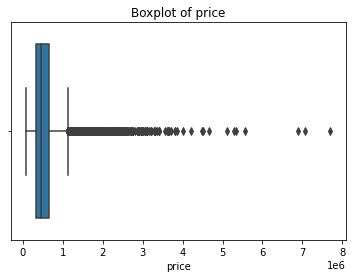

In [256]:
# checking for outliers
# price,bedrooms,bathrooms
import warnings
warnings.filterwarnings('ignore')

sns.boxplot(house['price']).set_title('Boxplot of price')

There are outliers in the prices of houses

Text(0.5, 1.0, 'Boxplot of bedrooms')

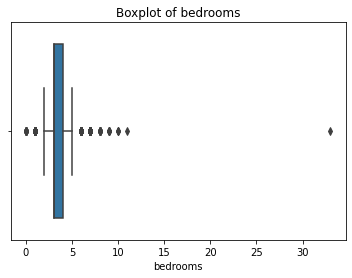

In [257]:
# checking for outliers in bedrooms
sns.boxplot(house['bedrooms']).set_title('Boxplot of bedrooms')

There are outliers in the number of bedrooms

Text(0.5, 1.0, 'Boxplot of bathrooms')

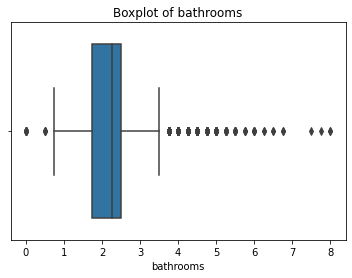

In [258]:
# checking for outliers in bathrooms
sns.boxplot(house['bathrooms']).set_title('Boxplot of bathrooms')

There are outliers in the number of bathrooms 

Text(0.5, 1.0, 'Boxplot of house floors')

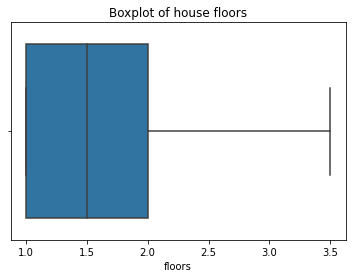

In [259]:
# checking for outliers in floors
sns.boxplot(house['floors']).set_title('Boxplot of house floors')

There is no presence of outliers in the number of floors of houses

Text(0.5, 1.0, 'Boxplot of Square feet area of living area')

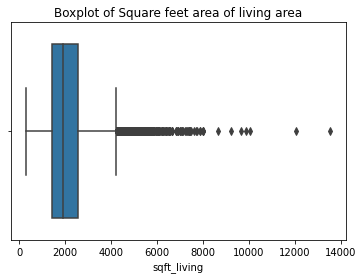

In [260]:
# checking for outliers in sqft_living
# Square feet area of living area
sns.boxplot(house['sqft_living']).set_title('Boxplot of Square feet area of living area')

Text(0.5, 1.0, 'Boxplot of Square feet area of parking Layout')

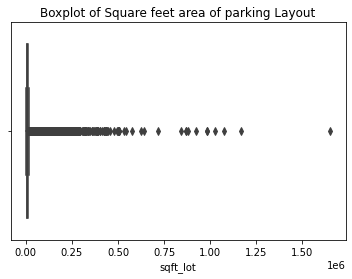

In [261]:
# checking for outliers in sqft_lot
# Square feet area of parking Layout
sns.boxplot(house['sqft_lot']).set_title('Boxplot of Square feet area of parking Layout')

Text(0.5, 1.0, 'Boxplot of Square feet area off basement')

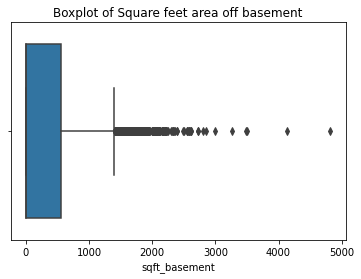

In [262]:
# checking for outliers in Square feet area off basement
# Square feet area off basement
sns.boxplot(house['sqft_basement']).set_title('Boxplot of Square feet area off basement')

>Dealing with outliers in price

In [263]:
# quantile-based flooring and capping for our price
# flooring - 20th percentile for the lower values
# capping - 80th percentile for the higher values
print(house['price'].quantile(0.20))
print(house['price'].quantile(0.80))

298470.0
700108.0000000005


In [264]:
# outlier treatment in price 
# check our skewness in price
house["price"] = np.where(house["price"] <325000.0, 325000.0,house['price'])
house["price"] = np.where(house["price"] >750000.0, 750000.0,house['price'])
print(house['price'].skew())

0.45779865224533717


From our skewness of 0.25 this means that our prices are now fairly symmetrical

>Dealing with outliers in bedrooms

In [265]:
index = house[(house['bedrooms'] >=10)|(house['bedrooms'] <= 1)].index
house.drop(index, inplace=True)
house['bedrooms'].describe()

count    21396.000000
mean         3.392270
std          0.874202
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: bedrooms, dtype: float64

>Dealing with outliers in bathrooms

In [266]:
index = house[(house['bathrooms'] >=5)|(house['bathrooms'] <= 1)].index
house.drop(index, inplace=True)
house['bathrooms'].describe()

count    17573.000000
mean         2.354094
std          0.585344
min          1.250000
25%          1.750000
50%          2.500000
75%          2.500000
max          4.750000
Name: bathrooms, dtype: float64

>Dealing with outliers in Square feet area of living area

In [267]:
# quantile-based flooring and capping for our sqft_living
# flooring - 10th percentile for the lower values
# capping - 90th percentile for the higher values
print(house['sqft_living'].quantile(0.10))
print(house['sqft_living'].quantile(0.90))

1360.0
3388.000000000011


In [268]:
# outlier treatment in sqft_living
# check our skewness in sqft_living
house["sqft_living"] = np.where(house["sqft_living"] <1360.0, 1360.0,house['sqft_living'])
house["sqft_living"] = np.where(house["sqft_living"] >3388.0, 3388.0,house['sqft_living'])
print(house['sqft_living'].skew())

0.4268569387563831


From our skewness of 0.43 this means our square feet of living space is fairly symmetrical

>Dealing with outliers in Square feet area of parking Layout

In [269]:
# quantile-based flooring and capping for our Square feet area of parking Layout
# flooring - 20th percentile for the lower values
# capping - 80th percentile for the higher values
print(house['sqft_lot'].quantile(0.20))
print(house['sqft_lot'].quantile(0.80))

4600.4
12783.200000000003


In [270]:
# outlier treatment in Square feet area of parking Layout
# check our skewness in Square feet area of parking Layout
house["sqft_lot"] = np.where(house["sqft_lot"] <4600.4, 4600.4,house['sqft_lot'])
house["sqft_lot"] = np.where(house["sqft_lot"] >12783.2, 12783.2,house['sqft_lot'])
print(house['sqft_lot'].skew())

0.29395092006170626


From our skewness of 0.3 this means our Square feet area of parking Layout is fairly symmetrical

>Dealing with outliers in Square feet area off basement

In [271]:
# quantile-based flooring and capping for our Square feet area off basement
# flooring - 10th percentile for the lower values
# capping - 90th percentile for the higher values
print(house['sqft_basement'].quantile(0.10))
print(house['sqft_basement'].quantile(0.90))

0.0
1010.0


In [272]:
# outlier treatment in Square feet area off basement
# check our skewness in Square feet area off basement
house["sqft_basement"] = np.where(house["sqft_basement"] <0.0, 0.0,house['sqft_basement'])
house["sqft_basement"] = np.where(house["sqft_basement"] >780.0, 780.0,house['sqft_basement'])
print(house['sqft_basement'].skew())

0.5961865667924343


From our skewness of 0.5 in  Square feet area off basement this means our data is moderately skewed

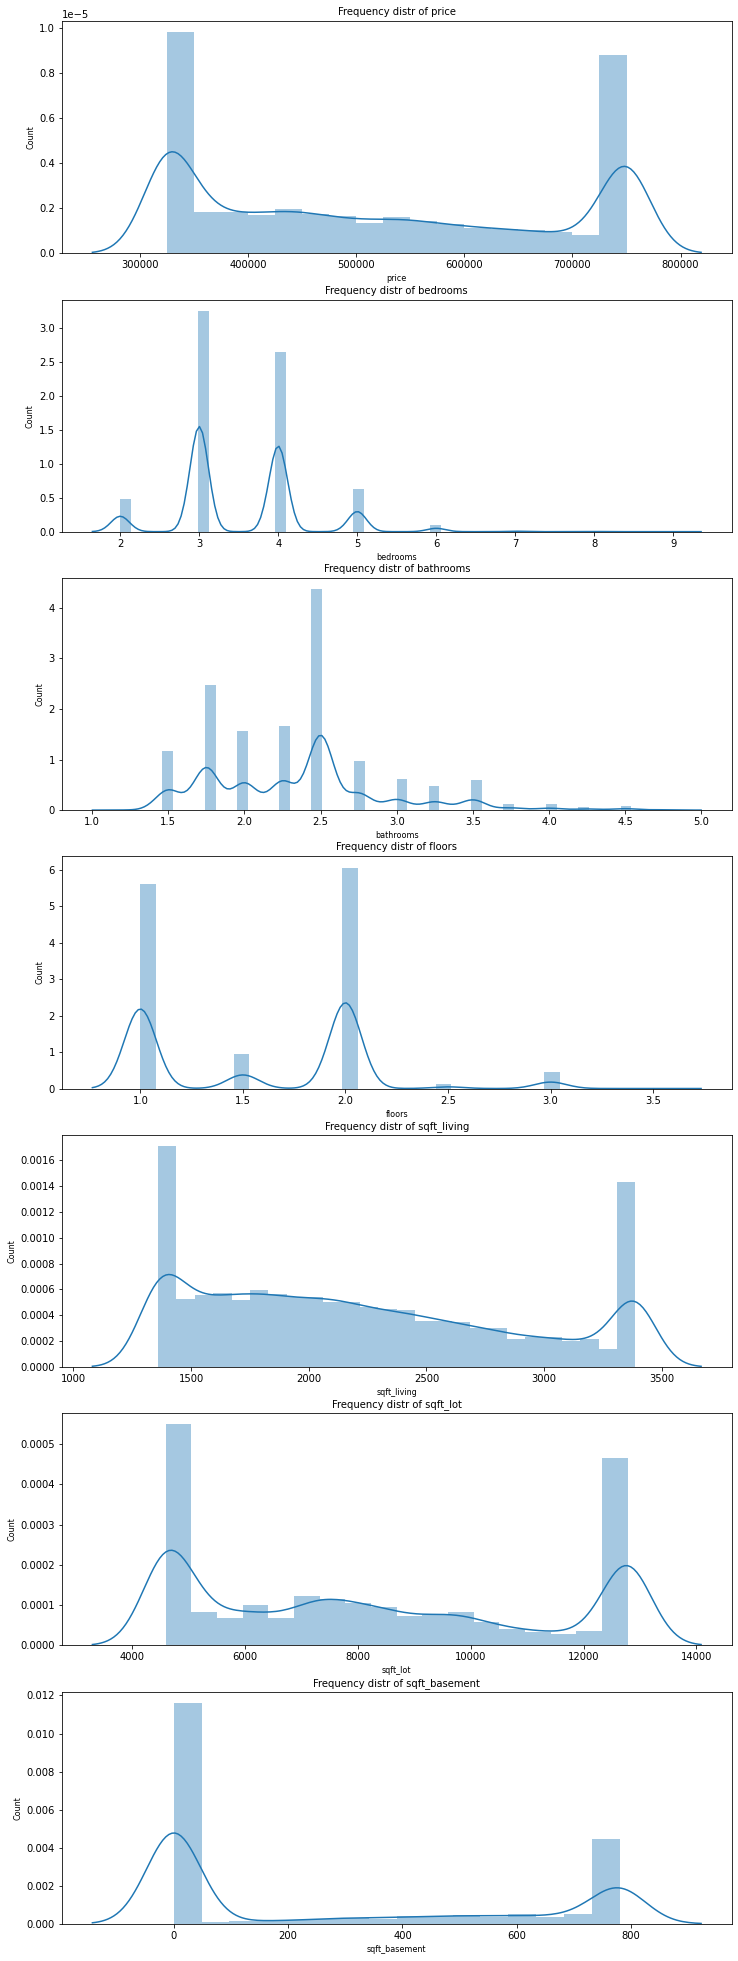

In [273]:
# checking for anomalies in our dataset

import matplotlib.pyplot as plt

column_names = ['price','bedrooms','bathrooms','floors','sqft_living','sqft_lot','sqft_basement']

fig, ax = plt.subplots(len(column_names), figsize=(12,35))

for i, col_val in enumerate(column_names):

    sns.distplot(house[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distr of '     +col_val    , fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

In [274]:
# identify missing data
house.isnull().values.any()

False

our output of false means that there are no missing values

In [275]:
# drop unwanted columns
house.drop(['id','yr_built','yr_renovated','zipcode','lat','long','sqft_above','sqft_living15','sqft_lot15','geometry'],axis=1, inplace=True)
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,3,7,400.0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,5,7,780.0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,3,8,0.0
5,750000.0,4,4.50,3388.0,12783.2,1.0,0,0,3,11,780.0
6,325000.0,3,2.25,1715.0,6819.0,2.0,0,0,3,7,0.0


## 6) Exploratory Analysis



### UNIVARIATE ANALYSIS




>MEASURES OF CENTRAL TENDENCY

In [276]:
# MEAN,MODE,MEDIAN
print(f'Mean of house prices is:{house.price.mean()}')
print(f'Mode of house prices is:{house.price.mode()}')
print(f'Median of house prices is:{house.price.median()}')


Mean of house prices is:517393.02532293857
Mode of house prices is:0    325000.0
dtype: float64
Median of house prices is:490000.0


>MEASURES OF DISPERSION

In [277]:
# VARIANCE,STANDARD DEVIATION,SKEWNESS, KURTOSIS
print(f'Variance of house prices is:{house.price.var()}')
print(f'Standard Deviation of house prices is:{house.price.std()}')
print(f'Skewness of house prices is:{house.price.skew()}')
print(f'Kurtosis of house prices is:{house.price.kurt()}')

Variance of house prices is:26375313448.99986
Standard Deviation of house prices is:162404.7827159036
Skewness of house prices is:0.2504954698681896
Kurtosis of house prices is:-1.4610639309321358


our price had a skewess of 0.25 this means that it is positively skewed and fairly symmetrical.

our price had a kurtosis of -1.46 

>Barchart

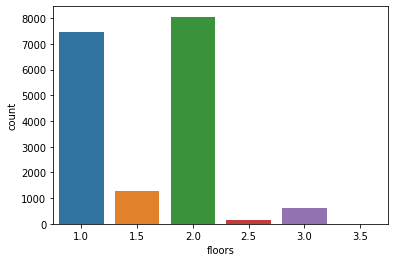

In [278]:
# barchart of count of floors
sns.countplot(house['floors'])

From our visualization we can see that the houses with 2 floors were more common followed closely by 1 floor


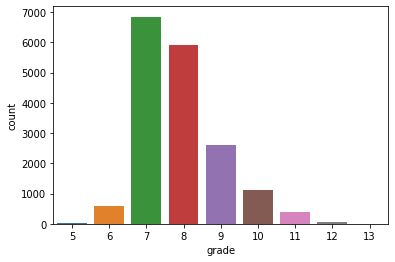

In [279]:
# barchart of house grade
sns.countplot(house['grade'])

From our barchart we can see that the grade that had the highest count was 7 followed by grade 8

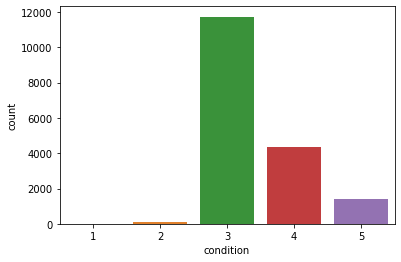

In [280]:
# barchart of house condition
sns.countplot(house['condition'])

From the barchart we can see that the condition of houses with the highest counts was 3 and 2 had the least count

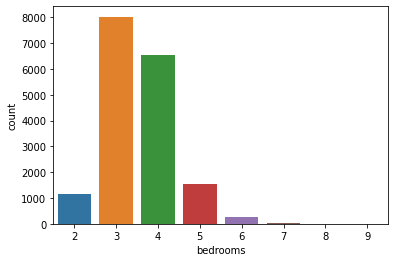

In [281]:
#barchart of count of bedrooms
sns.countplot(house['bedrooms'])

From our barchart most houses in the dataset had 3 bedrooms and the least at 7 bedrooms

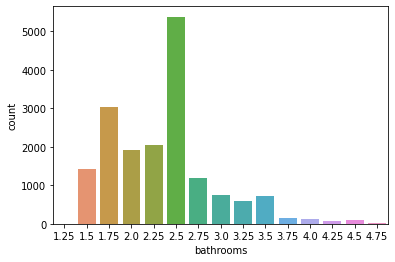

In [282]:
# barchart of count of bathrooms
sns.countplot(house['bathrooms'])

From our barchart 2.5 bathrooms had the highest count for most households

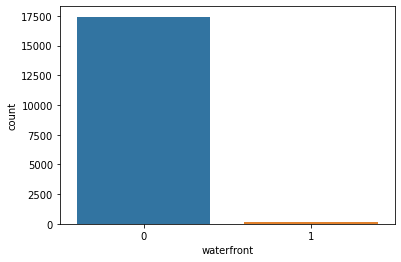

In [283]:
# barchart of count of waterfront
sns.countplot(house['waterfront'])

From our barchart most houses had no waterfront

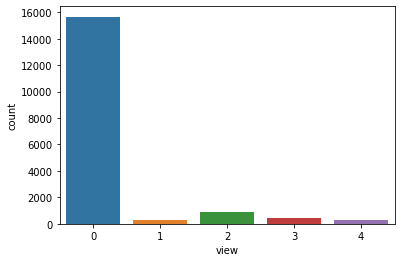

In [284]:
# barchart of count of views
sns.countplot(house['view'])

From our barchart most houses have not been viewed yet

>Histogram

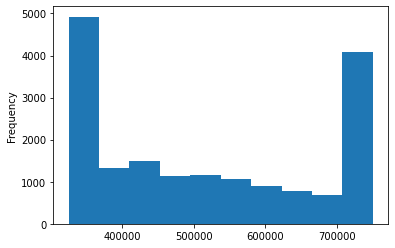

In [285]:
# histogram of house prices 
house['price'].plot.hist()

From our histogram most houses were less than 400k

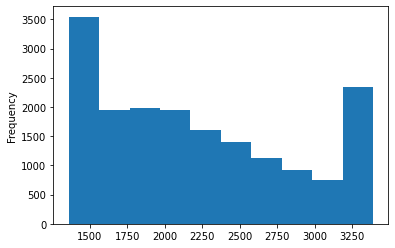

In [286]:
# histogram of square feet of living space
house['sqft_living'].plot.hist()

From our histogram the highest frequency for house square feet living space was 1500

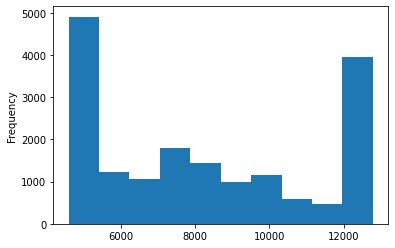

In [287]:
# histogram of square feet of parking lot
house['sqft_lot'].plot.hist()

From our histogram the highest frequency for housing square feet for parking lot was around 3000

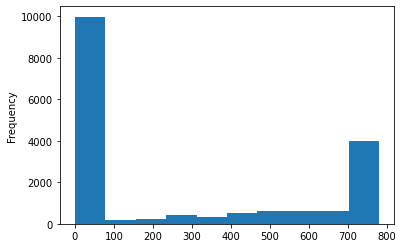

In [288]:
# histogram of square feet for basement 
house['sqft_basement'].plot.hist()

From our histogram the highest frequency for basement square space was 100

>PIECHART

([<matplotlib.patches.Wedge at 0x7f80b0ede090>,
 [Text(-0.027528260936789683, -1.099655489164582, '0'),
  Text(0.027528225545259348, 1.0996554900505564, '1')],
 [Text(-0.015015415056430734, -0.5998120849988628, '99.203'),
  Text(0.015015395751959643, 0.5998120854821216, '0.797')])

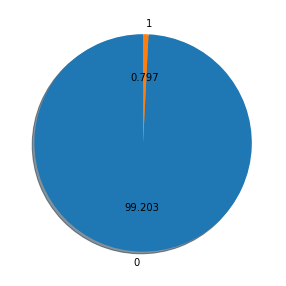

In [289]:
# plotting a piechart of the waterfront
plt.figure(figsize=(5,5))
plt.pie(house['waterfront'].value_counts(),startangle=90,autopct='%.3f',
        labels=['0','1'],shadow=True)

From our piechart 99% of houses had no waterfront 

### BIVARIATE ANALYSIS

>Scatter plot

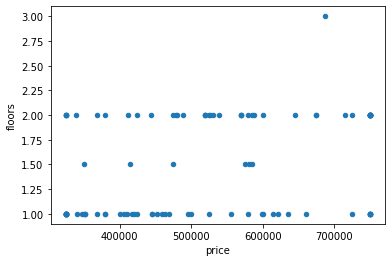

In [290]:
# scatter plot of house prices compared to the number of floors
house[house['price'] < 800000].sample(100).plot.scatter(x='price',y='floors')

From our plot we can see that one floored houses were more populated at prices below 800,000

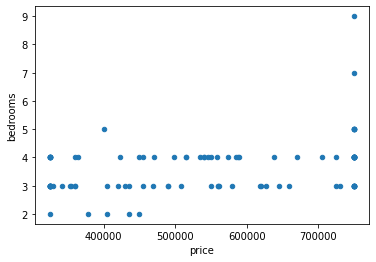

In [291]:
# scatter plot of house prices compared to number of bedrooms
house[house['price'] < 800000].sample(100).plot.scatter(x='price',y='bedrooms')

From our scatter plot we can see that the 3 and bedroomed houses were mostly common at prices below 800,000

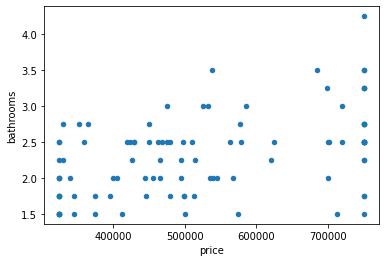

In [292]:
# scatter plot of house prices compared to the number of bathrooms
house[house['price'] < 800000].sample(100).plot.scatter(x='price',y='bathrooms')

Houses with the value 2.5 bathrooms were more frequent at prices below 800,000

### MULTIVARIATE ANALYSIS

>Paiplot

<Figure size 1008x1008 with 0 Axes>

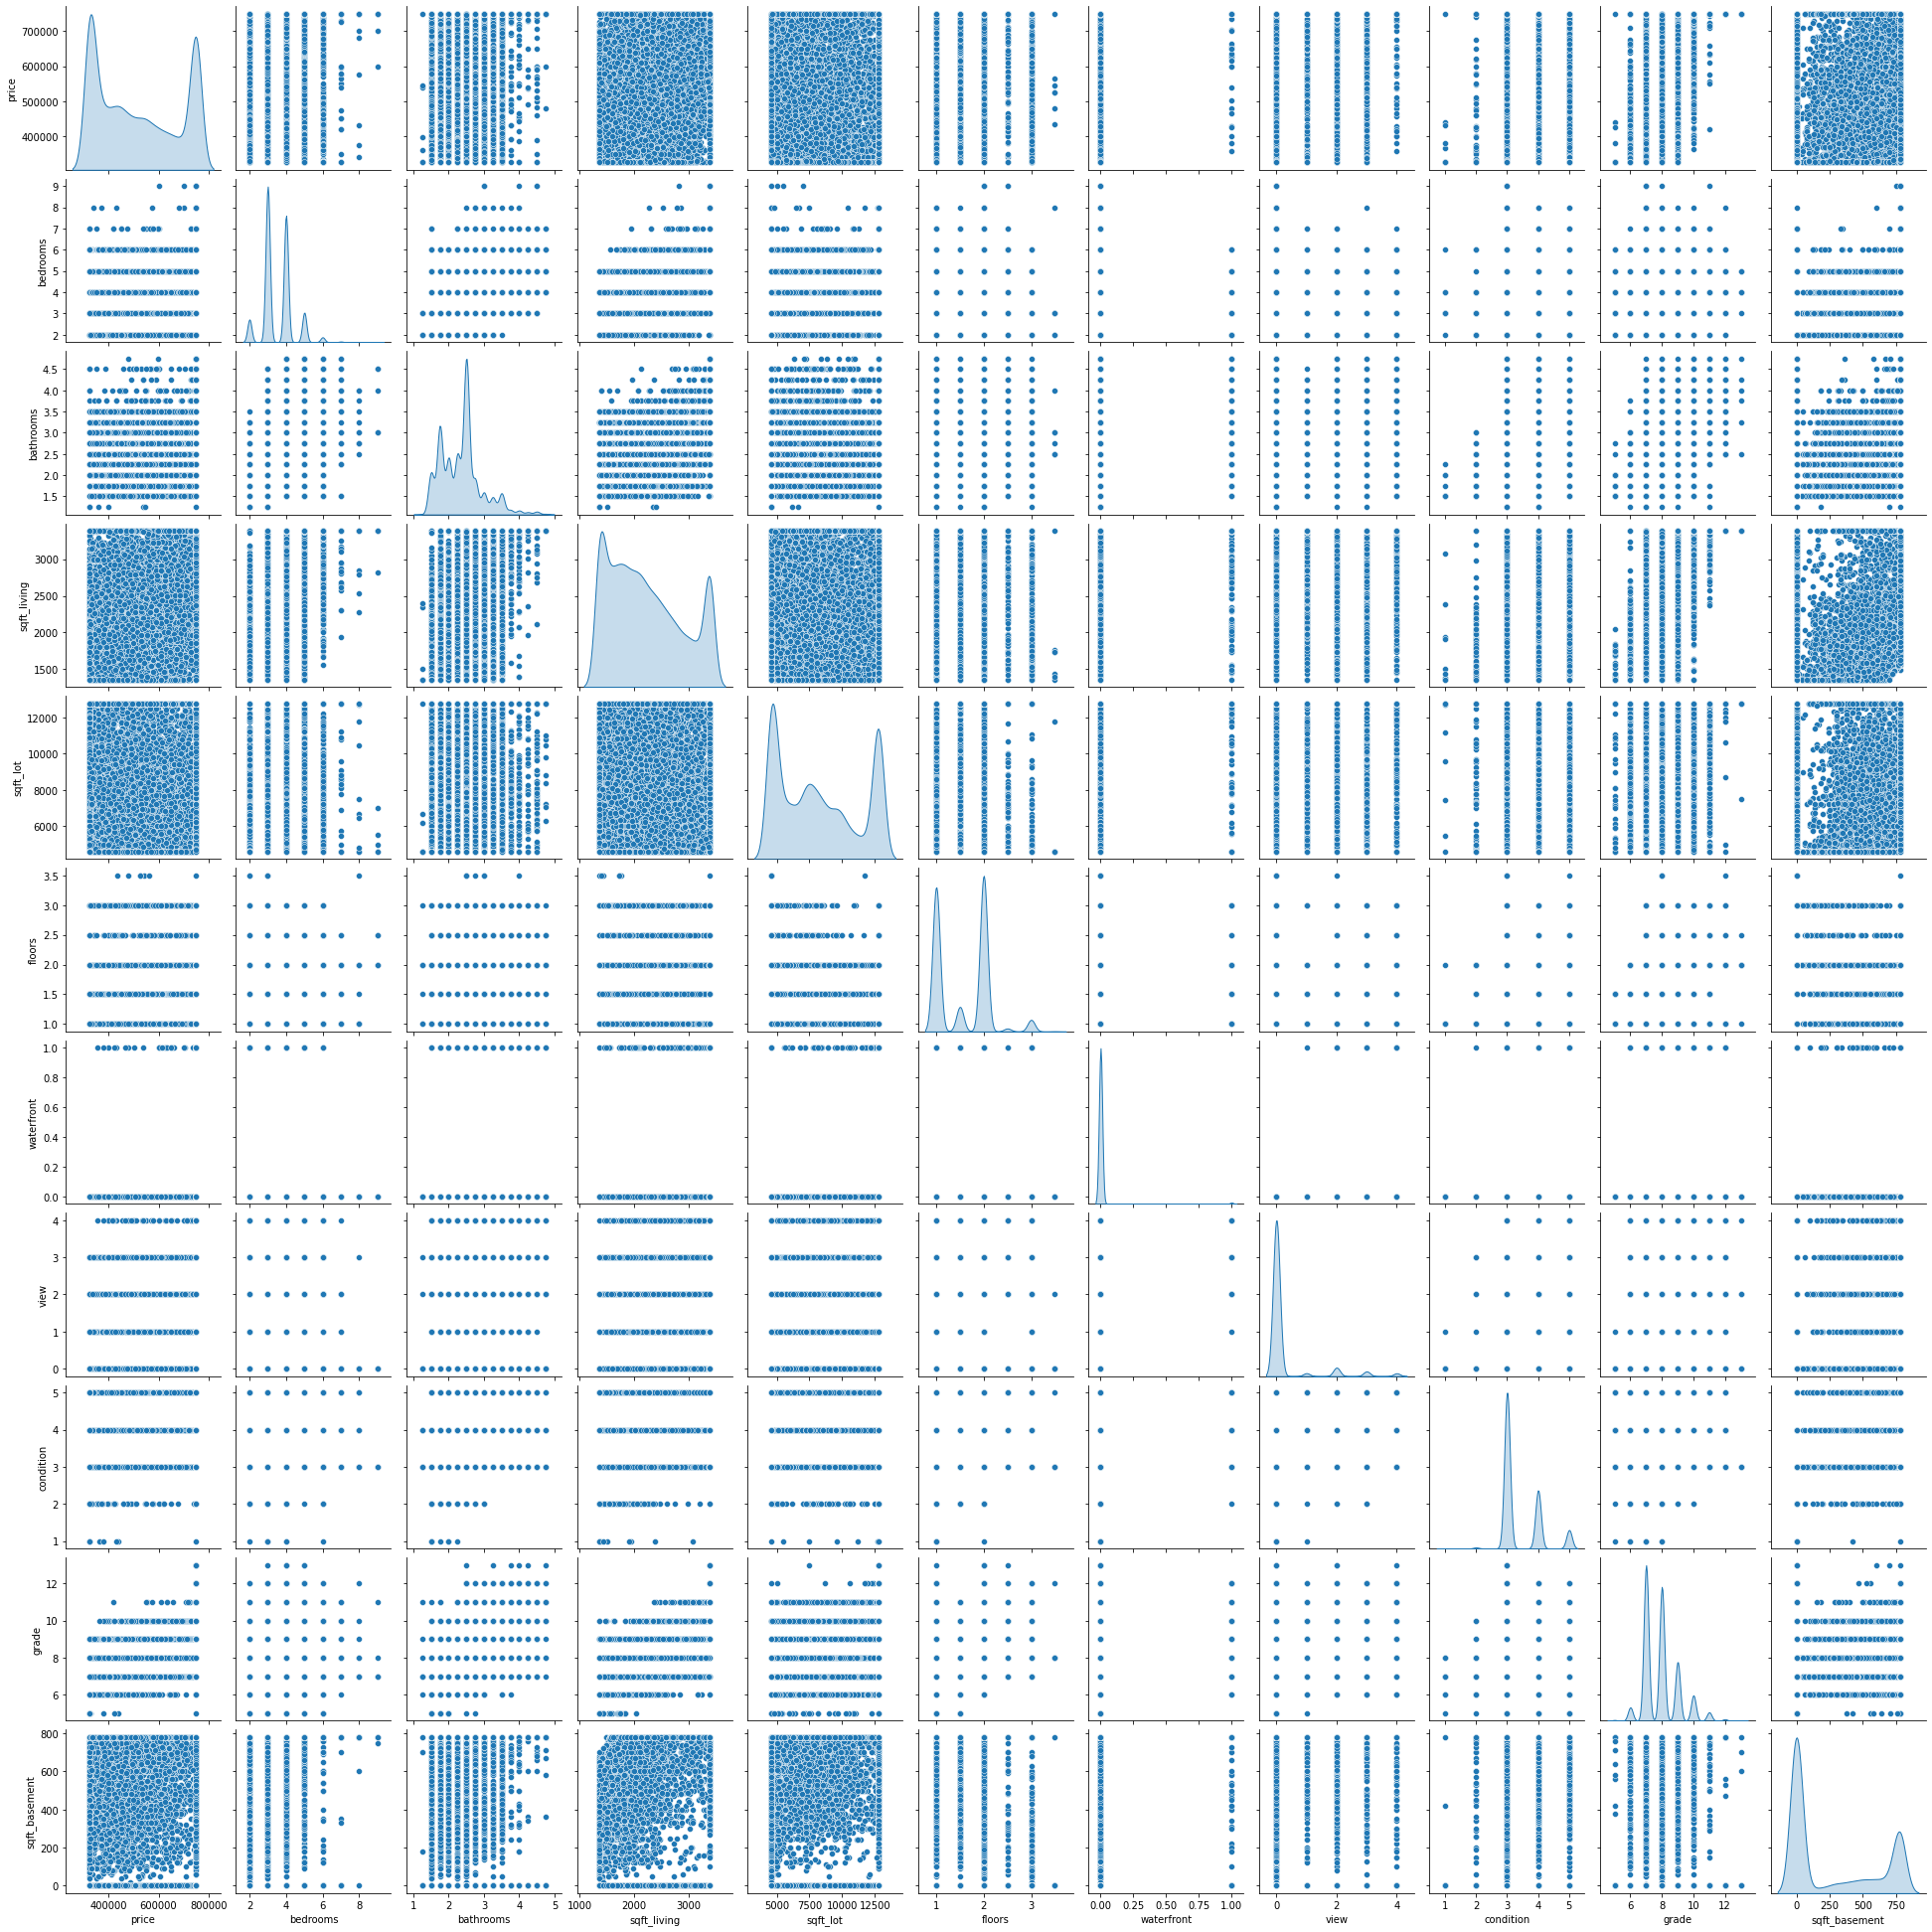

In [293]:
# plot a pairplot for the dataset
plt.figure(figsize=(14,14))
sns.pairplot(house,diag_kind='kde');

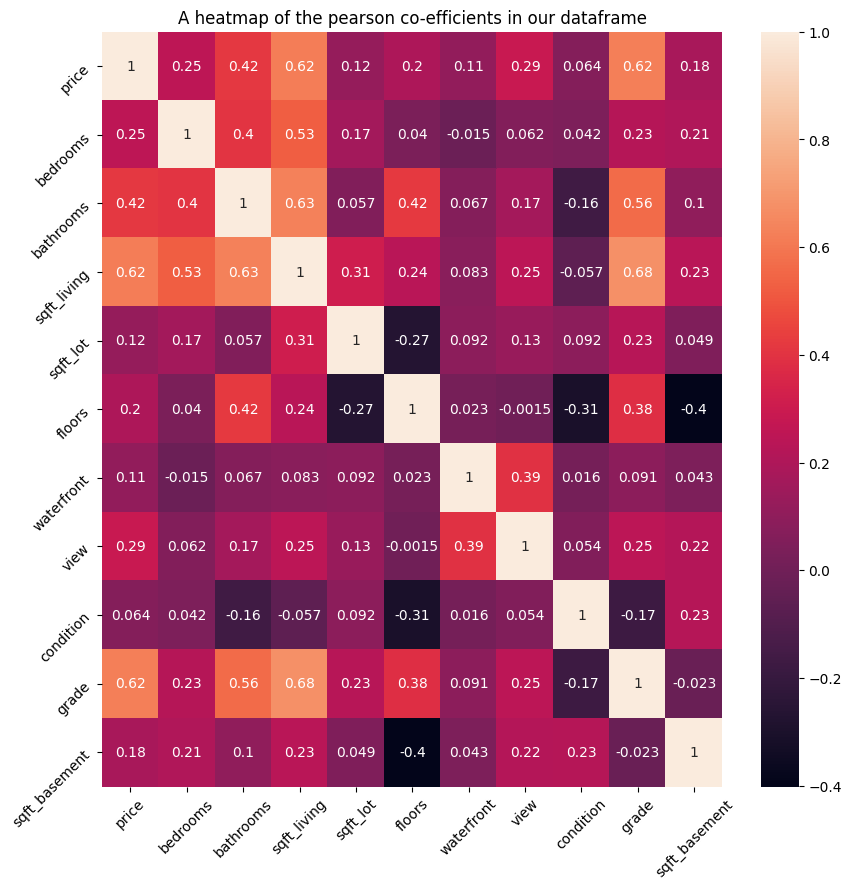

In [294]:
#correlation matrix
x = house.corr()
plt.figure(figsize = (10,10), dpi = 100)
sns.heatmap(x, xticklabels = x.columns, yticklabels=x.columns, annot = True)
plt.title('A heatmap of the pearson co-efficients in our dataframe', color = "Black")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [295]:
# drop columns with a high correlation
house.drop(['floors','condition','sqft_lot'], axis=1, inplace=True)
house.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,view,grade,sqft_basement
1,538000.0,3,2.25,2570.0,0,0,7,400.0
3,604000.0,4,3.00,1960.0,0,0,7,780.0
4,510000.0,3,2.00,1680.0,0,0,8,0.0
5,750000.0,4,4.50,3388.0,0,0,11,780.0
6,325000.0,3,2.25,1715.0,0,0,7,0.0


## 7)Implementing Solution

### MULTIPLE LINEAR REGRESSION

>Checking Multicollinearity

In [296]:
# categorize our predictor variables
predictor = house.drop('price', axis=1)
# find the correlation between the variables
correlations = predictor.corr()
correlations

,bedrooms,bathrooms,sqft_living,waterfront,view,grade,sqft_basement
bedrooms,1.000000,0.404846,0.528141,-0.015385,0.062351,0.225664,0.206396
bathrooms,0.404846,1.000000,0.627705,0.067449,0.173157,0.563799,0.104120
sqft_living,0.528141,0.627705,1.000000,0.082909,0.248966,0.680101,0.234349
waterfront,-0.015385,0.067449,0.082909,1.000000,0.392843,0.091367,0.043212
view,0.062351,0.173157,0.248966,0.392843,1.000000,0.247569,0.217478
grade,0.225664,0.563799,0.680101,0.091367,0.247569,1.000000,-0.023371
sqft_basement,0.206396,0.104120,0.234349,0.043212,0.217478,-0.023371,1.000000


In [297]:
# compute VIF score for each variable
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_living,waterfront,view,grade,sqft_basement
bedrooms,1.511734,-0.283836,-0.900662,0.054040,0.074877,0.406067,-0.080522
bathrooms,-0.283836,1.804565,-0.623927,-0.026528,0.000078,-0.526489,0.005733
sqft_living,-0.900662,-0.623927,3.004875,-0.023309,-0.110202,-1.470003,-0.462716
waterfront,0.054040,-0.026528,-0.023309,1.187328,-0.477674,0.029566,0.050339
view,0.074877,0.000078,-0.110202,-0.477674,1.325086,-0.232537,-0.262607
grade,0.406067,-0.526489,-1.470003,0.029566,-0.232537,2.269582,0.417838
sqft_basement,-0.080522,0.005733,-0.462716,0.050339,-0.262607,0.417838,1.189161


From our VIF score findings our predictor variables are correlated

>Residual plots and Heteroskedasticity test

In [298]:
# import libraries
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [299]:
# data preparation
X = predictor.values
y = house['price'].values

In [300]:
# create our test split
X_train, X_test, price_train, price_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [301]:
# fit our model
model = LinearRegression()
model.fit(X_train, price_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [302]:
# prediction for prices based on our model
prices_predict = model.predict(X_test)

In [303]:
#create the residual by subtracting the test value from the predicted value for each row in the dataset
residuals = np.subtract(prices_predict, price_test)

In [304]:
# description of our residual
pd.DataFrame(residuals).describe()
residuals.mean()

2405.2307988284397

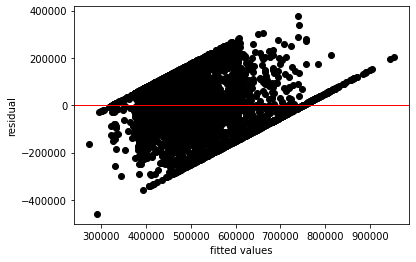

In [305]:
# plot the residual plot
plt.scatter(prices_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

our residuals are centered around a mean that is very close to 0

In [306]:
# bartletts test
import scipy as sp
from scipy import stats

test_result, p_value = sp.stats.bartlett(prices_predict, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(prices_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')


0.04221032134294714
the variances are homogeneous!


### QUANTILE REGRESSION

In [307]:
# import libraries
from sklearn.decomposition import PCA

# dimensionality reduction
pca = PCA(n_components=2)
pc_s = pca.fit_transform(X)
pca_data = pd.DataFrame(pc_s, columns=['PC1','PC2'])


In [308]:
# check percentage of the PCA components
print(pca.explained_variance_ratio_)

[0.80867389 0.19132261]


In [309]:
# concat the dataset
final_house = pd.concat([pca_data, house['price']], axis=1)
final_house.head()

,PC1,PC2,price
0,369.498401,73.433708,NaN
1,-173.998294,543.655956,538000.0
2,-571.869010,-183.323954,NaN
3,1236.639115,321.624973,604000.0
4,-537.295652,-188.765031,510000.0


In [310]:
# drop PC2 since it accounts for less 3% of the data
final_house.drop(['PC2'], axis=1, inplace=True)
final_house.head()

,PC1,price
0,369.498401,NaN
1,-173.998294,538000.0
2,-571.869010,NaN
3,1236.639115,604000.0
4,-537.295652,510000.0


In [311]:
# drop null values in price
final_house.dropna(inplace=True)
print(final_house)

               PC1     price
1      -173.998294  538000.0
3      1236.639115  604000.0
4      -537.295652  510000.0
5      -887.978437  750000.0
6      -364.423923  325000.0
...            ...       ...
17567   257.916671  325000.0
17568  1236.636368  397500.0
17569  -867.764113  750000.0
17570  -720.044385  750000.0
17572  -650.895748  325000.0

[14036 rows x 2 columns]


In [334]:
# We will use the python package statsmodels for Quantile Regression
#
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ X', house)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3485
Model:                       QuantReg   Bandwidth:                   2.148e+04
Method:                 Least Squares   Sparsity:                    3.218e+05
Date:                Sat, 29 May 2021   No. Observations:                17573
Time:                        14:24:07   Df Residuals:                    17565
                                        Df Model:                            7
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.077e+05   1213.649    418.349      0.000    5.05e+05     5.1e+05
X[0]       -9463.5388   1492.213     -6.342      0.000   -1.24e+04   -6538.653
X[1]       -1.004e+04   1630.345     -6.158      0.000   -1.32e+04   -6844.281
X[2]        8.104e+04   2103.809     38.521      0.0

Our accuracy is represented by the Pseudo R-squared at 35%

In [335]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['X[3]']] + res.conf_int().loc['X[3]'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

    qt      intercept       x_coef  cf_lower_bound  cf_upper_bound
0  0.1  366438.735546  9125.673370     7639.313541    10612.033200
1  0.2  412826.186431  -717.796376    -2169.204560      733.611807
2  0.3  448441.005676   144.341675    -1515.002132     1803.685482
3  0.4  476890.704285   672.730896    -1219.594844     2565.056636
4  0.5  507729.247576  1986.472958     -605.655056     4578.600971
5  0.6  539737.348461  3035.782745      597.783597     5473.781893
6  0.7  577007.812189  2970.159988      280.311838     5660.008139
7  0.8  619535.250740  2890.554169       78.450118     5702.658219
8  0.9  682341.932552  1365.815421    -1497.286047     4228.916889


<Figure size 432x288 with 0 Axes>

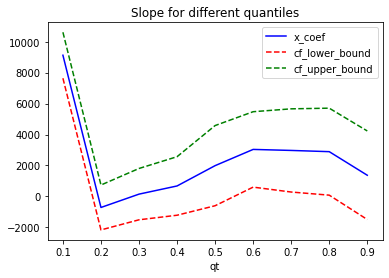

In [336]:
## Plot the changes in the quantile coeffiecients
# 

plt.figure(6)
params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
	title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])
plt.show()

### RIDGE REGRESSION

In [315]:
# import our libraries
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
# Creating our baseline regression model
# This is a model that has no regularization to it
# 
regression = LinearRegression()
regression.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model)


13617652490.53012


The output of 13617652490.53  value of will be our indicator to determine if the regularized ridge regression model is superior or not.

In [317]:
# import libraries
from sklearn.model_selection import GridSearchCV

ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [318]:
# We now use the .fit function to run the model  
# Then use the .best_params_ and .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

13642640688.394403

The best_params_ tells us what to set alpha too which in this case is 0.01. 

The best_score_ tells us what the best possible mean squared error is. 

In this case, the value of 13642640688.39 is slightly worse than what the baseline model was. 

In [319]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

13618557008.49322


The 13618557008.49 is lower than the 13642640688.39. This is because the last results are not cross-validated. 

Therefore these results indicate that there is little difference between the ridge and baseline models. 

This is confirmed with the coefficients of each model found below.

In [320]:
# Coefficients of the model
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,house.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 85.91922628042994,
 'bedrooms': -11232.424191470667,
 'grade': 47.16423028625832,
 'price': -5841.432853116497,
 'sqft_living': 18720.250697357445,
 'view': 58634.33886467893,
 'waterfront': 18067.268357753666}

### LASSO REGRESSION

In [321]:
# Import our libraries
from sklearn.preprocessing import StandardScaler

# standardizing our features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [322]:
# print scores, MSE and coefficients

# import our libraries
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

# create a lasso object
lasso = linear_model.Lasso()

# fitting the models
lasso.fit(X,y)

print(f'Lasso Score is:', lasso.score(X,y))
print(f'Lasso MSE is:', mean_squared_error(y, lasso.predict(X)))
print(f'lasso coef:', lasso.coef_)

Lasso Score is: 0.4836676542250984
Lasso MSE is: 13617652500.51731
lasso coef: [-4839.40112799 -6571.92047828 56452.24912464  1663.50181488
 14529.74136468 64355.12955398 15796.00902262]


In [323]:
# Splitting the data into training and test sets, building Lasso, 
# and choosing the regularization parameter with the help of GridSearch. 


# import our libraries
from sklearn.model_selection import GridSearchCV

# create our test split
X_train, X_test, price_train, price_test = train_test_split(X, y, test_size=0.2, random_state=100)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}


In [324]:
# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

gridlasso.fit(X_train, price_train) 
linear.fit(X_train, price_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, price_test))
print("linear score:", linear.score(X_test, price_test)) 
print("lasso MSE:", mean_squared_error(price_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(price_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 22.0}
lasso score: 0.4759462607163235
linear score: 0.4759513978690666
lasso MSE: 13849664262.521612
linear MSE: 13849528498.122995
lasso best estimator coef: [-4974.79990919 -5805.05628515 57339.49095143  2226.06718378
 14409.18870951 63395.24019783 15185.21019187]
linear coef: [-5013.23120955 -5863.77034716 57395.61193156  2243.78758929
 14412.49952131 63419.09276779 15206.99697506]


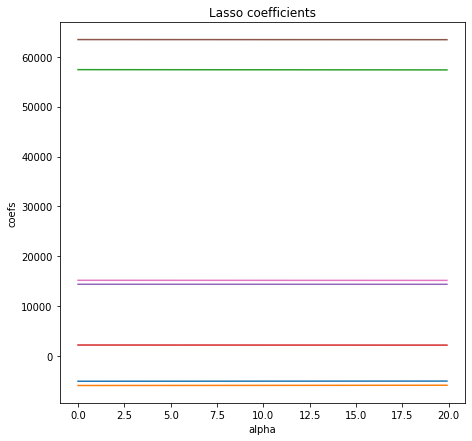

In [325]:
# visualizations

coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, price_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()


### ELASTIC NET REGRESSION

In [326]:
# import our libraries
from sklearn.linear_model import ElasticNet

# Creating our linear regression model for the purpose of comparison
# 
regression = LinearRegression()
regression.fit(X,y)
first_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print(first_model) 


13617652490.530123


This mean standard error score of 13617652490.53 is our benchmark for determining if the elastic net model will be better or worst. 

In [329]:
# Elastic Net Model
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},
                    scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [331]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
search.best_params_
abs(search.best_score_)

13650026991.742414

In [332]:
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

19338164415.980488


Our Second model of 19338164415.98 is higher compared to our First model which was at 13617652490.53

In [333]:
# below are the coefficients for our second model
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,predictor.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


{'bathrooms': 8491.87389806443,
 'bedrooms': 4630.679616994311,
 'grade': 15512.963362368777,
 'sqft_basement': 4185.134039646005,
 'sqft_living': 14802.873323055212,
 'view': 6689.133082513018,
 'waterfront': 2279.069323974455}